# If you happy and I know it you can enter my House 

You'll see how you can in a couple of hours build a deep learning algorithm.

In [1]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import h5py
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
from keras.models import Sequential

import pydot
from IPython.display import SVG


import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow


In [2]:
def load_dataset(path_to_train, path_to_test):
    train_dataset = h5py.File(path_to_train)
    train_x = np.array(train_dataset['train_set_x'][:])
    train_y = np.array(train_dataset['train_set_y'][:])

    test_dataset = h5py.File(path_to_test)
    test_x = np.array(test_dataset['test_set_x'][:])
    test_y = np.array(test_dataset['test_set_y'][:])

    # y reshaped
    train_y = train_y.reshape((1, train_x.shape[0]))
    test_y = test_y.reshape((1, test_y.shape[0]))

    return train_x, train_y, test_x, test_y

This dataset can be used to solve the Happy House problem.
Where, we allow a person to enter the house only if he/she is smiling!
So, a smile detector!


![Texte alternatif…](https://raw.githubusercontent.com/Kulbear/deep-learning-coursera/master/Convolutional%20Neural%20Networks/images/house-members.png)



Details of the "Happy" dataset:

* Images are of shape (64,64,3)
* Training: 600 pictures
* Test: 150 pictures


# Load Dataset

In [3]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig = load_dataset("train_happy.h5","test_happy.h5")

# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255.

# Reshape
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


Image shape : (64, 64, 3)


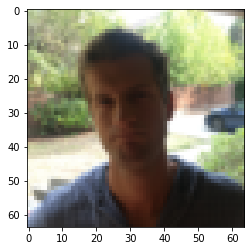

In [4]:
# Sample image from dataset
print("Image shape :",X_train_orig[10].shape)
imshow(X_train_orig[10])

# Building Model

_________________________________________________________________

conv2d_3 (Conv2D)            (None, 64, 64, 32)        4736      
_________________________________________________________________
batch_normalization_2 (Batch (None, 64, 64, 32)        128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 32769     
_________________________________________________________________



In [5]:
model = Sequential([
    Conv2D(32, (7,7), activation = 'relu', padding = 'same'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(1, activation = 'sigmoid')
])

In [6]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=["accuracy"])

In [7]:
history_model = model.fit(X_train, Y_train, epochs = 10, batch_size = 16)

Epoch 1/10
38/38 [==============================] - 2s 40ms/step - loss: 1.1670 - accuracy: 0.6383
Epoch 2/10
38/38 [==============================] - 1s 39ms/step - loss: 0.3245 - accuracy: 0.8717
Epoch 3/10
38/38 [==============================] - 1s 38ms/step - loss: 0.2185 - accuracy: 0.9233
Epoch 4/10
38/38 [==============================] - 1s 37ms/step - loss: 0.1524 - accuracy: 0.9417
Epoch 5/10
38/38 [==============================] - 1s 35ms/step - loss: 0.1133 - accuracy: 0.9567
Epoch 6/10
38/38 [==============================] - 1s 35ms/step - loss: 0.0889 - accuracy: 0.9733
Epoch 7/10
38/38 [==============================] - 1s 35ms/step - loss: 0.0661 - accuracy: 0.9817
Epoch 8/10
38/38 [==============================] - 1s 34ms/step - loss: 0.0560 - accuracy: 0.9850
Epoch 9/10
38/38 [==============================] - 1s 35ms/step - loss: 0.0607 - accuracy: 0.9800
Epoch 10/10
38/38 [==============================] - 1s 35ms/step - loss: 0.0487 - accuracy: 0.9850


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        4736      
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                                 
 dense (Dense)               (None, 1)                 32769     
                                                                 
Total params: 37,633
Trainable params: 37,569
Non-traina

# Evaluate / Test

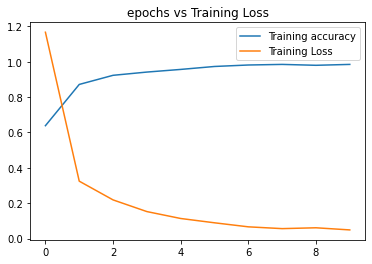

In [9]:
train_accuracy = history_model.history['accuracy']
train_loss = history_model.history['loss']

count = range(len(train_accuracy))
plt.plot(count, train_accuracy, label = 'Training accuracy')
plt.plot(count, train_loss, label = 'Training Loss')
plt.title('epochs vs Training Loss')
plt.legend()
plt.show()

Evaluate Test set

In [10]:
predictions = model.evaluate(X_test, Y_test)

print ("\nLoss = " + str(predictions[0]))
print ("Test Accuracy = " + str(predictions[1]))

5/5 [==============================] - 0s 15ms/step - loss: 0.1978 - accuracy: 0.9267

Loss = 0.19784775376319885
Test Accuracy = 0.9266666769981384


Confusion Matrix

In [11]:
Y_pred = model.predict(X_test)

Y_pred[Y_pred < 0.5] = 0
Y_pred[Y_pred >= 0.5] = 1

5/5 [==============================] - 0s 15ms/step


In [12]:
confusion_mat = confusion_matrix(Y_test, Y_pred)
print(confusion_mat)

[[65  1]
 [10 74]]


# Note

Before you submit your work 

* You should compare different optimizers

---

* Display images with Predicted & expected labels (Happy-sad)


# Comparing diffrent optimizers

## 1. SGD optimizer

### 1.1 Model Building

In [13]:
model1 = Sequential([
    Conv2D(32, (7,7), activation = 'relu', padding = 'same'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(1, activation = 'sigmoid')
])

In [14]:
model1.compile(optimizer='sgd', loss='binary_crossentropy', metrics=["accuracy"])

In [15]:
history_model1 = model1.fit(X_train, Y_train, epochs = 10, batch_size = 16)

Epoch 1/10
38/38 [==============================] - 2s 35ms/step - loss: 5.7819 - accuracy: 0.5550
Epoch 2/10
38/38 [==============================] - 1s 34ms/step - loss: 0.8592 - accuracy: 0.7583
Epoch 3/10
38/38 [==============================] - 1s 35ms/step - loss: 0.4235 - accuracy: 0.8433
Epoch 4/10
38/38 [==============================] - 1s 34ms/step - loss: 0.3631 - accuracy: 0.8567
Epoch 5/10
38/38 [==============================] - 1s 34ms/step - loss: 0.1825 - accuracy: 0.9283
Epoch 6/10
38/38 [==============================] - 1s 36ms/step - loss: 0.1367 - accuracy: 0.9550
Epoch 7/10
38/38 [==============================] - 1s 37ms/step - loss: 0.1349 - accuracy: 0.9533
Epoch 8/10
38/38 [==============================] - 2s 42ms/step - loss: 0.1088 - accuracy: 0.9600
Epoch 9/10
38/38 [==============================] - 2s 42ms/step - loss: 0.1023 - accuracy: 0.9667
Epoch 10/10
38/38 [==============================] - 2s 44ms/step - loss: 0.0828 - accuracy: 0.9767


### 1.2 Evaluation

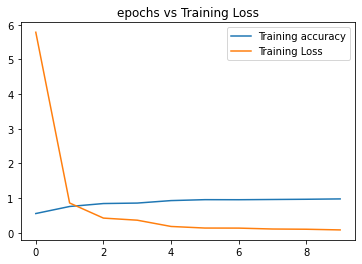

In [16]:
train_accuracy = history_model1.history['accuracy']
train_loss = history_model1.history['loss']

count = range(len(train_accuracy))
plt.plot(count, train_accuracy, label = 'Training accuracy')
plt.plot(count, train_loss, label = 'Training Loss')
plt.title('epochs vs Training Loss')
plt.legend()
plt.show()

In [17]:
eval1 = model1.evaluate(X_test, Y_test)

print ("\nLoss = " + str(eval1[0]))
print ("Test Accuracy = " + str(eval1[1]))

5/5 [==============================] - 0s 16ms/step - loss: 0.1949 - accuracy: 0.9600

Loss = 0.19487564265727997
Test Accuracy = 0.9599999785423279


**Prediction**

In [18]:
Y_pred1 = model1.predict(X_test)

Y_pred1[Y_pred1 < 0.5] = 0
Y_pred1[Y_pred1 >= 0.5] = 1

5/5 [==============================] - 0s 13ms/step


**Confusion Matrix**

In [19]:
confusion_mat = confusion_matrix(Y_test, Y_pred1)
print(confusion_mat)

[[64  2]
 [ 4 80]]


## 2. RMSprop optimizer

### 2.1 Model Building

In [20]:
model2 = Sequential([
    Conv2D(32, (7,7), activation = 'relu', padding = 'same'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(1, activation = 'sigmoid')
])

In [21]:
model2.compile(optimizer='RMSprop', loss='binary_crossentropy', metrics=["accuracy"])

In [22]:
history_model2 = model2.fit(X_train, Y_train, epochs = 10, batch_size = 16)

Epoch 1/10
38/38 [==============================] - 2s 38ms/step - loss: 2.3564 - accuracy: 0.6483
Epoch 2/10
38/38 [==============================] - 1s 36ms/step - loss: 1.0497 - accuracy: 0.7383
Epoch 3/10
38/38 [==============================] - 1s 34ms/step - loss: 0.5296 - accuracy: 0.8450
Epoch 4/10
38/38 [==============================] - 1s 34ms/step - loss: 0.4811 - accuracy: 0.8833
Epoch 5/10
38/38 [==============================] - 1s 34ms/step - loss: 0.3998 - accuracy: 0.8633
Epoch 6/10
38/38 [==============================] - 1s 35ms/step - loss: 0.2504 - accuracy: 0.9117
Epoch 7/10
38/38 [==============================] - 1s 36ms/step - loss: 0.1726 - accuracy: 0.9317
Epoch 8/10
38/38 [==============================] - 1s 38ms/step - loss: 0.1535 - accuracy: 0.9483
Epoch 9/10
38/38 [==============================] - 1s 34ms/step - loss: 0.2457 - accuracy: 0.9283
Epoch 10/10
38/38 [==============================] - 1s 34ms/step - loss: 0.1581 - accuracy: 0.9533


### 2.2 Evaluation

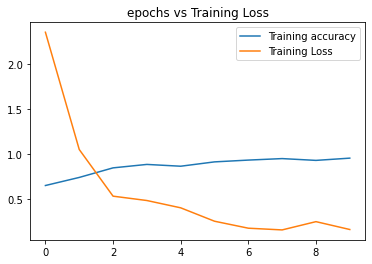

In [23]:
train_accuracy = history_model2.history['accuracy']
train_loss = history_model2.history['loss']

count = range(len(train_accuracy))
plt.plot(count, train_accuracy, label = 'Training accuracy')
plt.plot(count, train_loss, label = 'Training Loss')
plt.title('epochs vs Training Loss')
plt.legend()
plt.show()

In [24]:
eval2 = model2.evaluate(X_test, Y_test)

print ("\nLoss = " + str(eval2[0]))
print ("Test Accuracy = " + str(eval2[1]))

5/5 [==============================] - 0s 16ms/step - loss: 0.6687 - accuracy: 0.6667

Loss = 0.6686945557594299
Test Accuracy = 0.6666666865348816


**Prediction**

In [25]:
Y_pred2 = model2.predict(X_test)

Y_pred2[Y_pred2 < 0.5] = 0
Y_pred2[Y_pred2 >= 0.5] = 1

5/5 [==============================] - 0s 19ms/step


**Confusion Matrix**

In [26]:
confusion_mat = confusion_matrix(Y_test, Y_pred2)
print(confusion_mat)

[[16 50]
 [ 0 84]]


## 3. Adam optimizer

### 3.1 Model Building

In [27]:
model3 = Sequential([
    Conv2D(32, (7,7), activation = 'relu', padding = 'same'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(1, activation = 'sigmoid')
])

In [28]:
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=["accuracy"])

In [29]:
history_model3 = model3.fit(X_train, Y_train, epochs = 10, batch_size = 16)

Epoch 1/10
38/38 [==============================] - 2s 37ms/step - loss: 0.9460 - accuracy: 0.6783
Epoch 2/10
38/38 [==============================] - 1s 35ms/step - loss: 0.2365 - accuracy: 0.9083
Epoch 3/10
38/38 [==============================] - 1s 36ms/step - loss: 0.1684 - accuracy: 0.9383
Epoch 4/10
38/38 [==============================] - 1s 34ms/step - loss: 0.1611 - accuracy: 0.9350
Epoch 5/10
38/38 [==============================] - 1s 34ms/step - loss: 0.1137 - accuracy: 0.9700
Epoch 6/10
38/38 [==============================] - 1s 33ms/step - loss: 0.1027 - accuracy: 0.9667
Epoch 7/10
38/38 [==============================] - 1s 34ms/step - loss: 0.1044 - accuracy: 0.9667
Epoch 8/10
38/38 [==============================] - 1s 33ms/step - loss: 0.0809 - accuracy: 0.9817
Epoch 9/10
38/38 [==============================] - 1s 34ms/step - loss: 0.0752 - accuracy: 0.9767
Epoch 10/10
38/38 [==============================] - 1s 34ms/step - loss: 0.0475 - accuracy: 0.9933


### 3.2 Evaluation

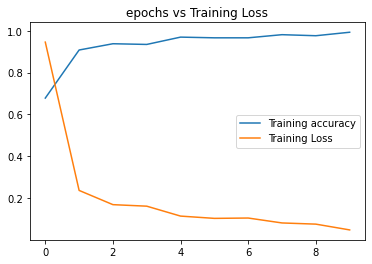

In [30]:
train_accuracy = history_model3.history['accuracy']
train_loss = history_model3.history['loss']

count = range(len(train_accuracy))
plt.plot(count, train_accuracy, label = 'Training accuracy')
plt.plot(count, train_loss, label = 'Training Loss')
plt.title('epochs vs Training Loss')
plt.legend()
plt.show()

In [31]:
eval3 = model3.evaluate(X_test, Y_test)

print ("\nLoss = " + str(eval3[0]))
print ("Test Accuracy = " + str(eval3[1]))

5/5 [==============================] - 0s 16ms/step - loss: 0.1630 - accuracy: 0.9533

Loss = 0.16298139095306396
Test Accuracy = 0.95333331823349


**Prediction**

In [32]:
Y_pred3 = model3.predict(X_test)

Y_pred3[Y_pred3 < 0.5] = 0
Y_pred3[Y_pred3 >= 0.5] = 1

5/5 [==============================] - 0s 15ms/step


**Confusion Matrix**

In [33]:
confusion_mat = confusion_matrix(Y_test, Y_pred3)
print(confusion_mat)

[[63  3]
 [ 4 80]]


## 4. Adagrad optimizer

### 4.1 Model Building

In [34]:
model4 = Sequential([
    Conv2D(32, (7,7), activation = 'relu', padding = 'same'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(1, activation = 'sigmoid')
])

In [35]:
model4.compile(optimizer='adagrad', loss='binary_crossentropy', metrics=["accuracy"])

In [36]:
history_model4 = model4.fit(X_train, Y_train, epochs = 10, batch_size = 16)

Epoch 1/10
38/38 [==============================] - 2s 36ms/step - loss: 0.6120 - accuracy: 0.7483
Epoch 2/10
38/38 [==============================] - 2s 40ms/step - loss: 0.2429 - accuracy: 0.9083
Epoch 3/10
38/38 [==============================] - 1s 39ms/step - loss: 0.1866 - accuracy: 0.9517
Epoch 4/10
38/38 [==============================] - 1s 34ms/step - loss: 0.1513 - accuracy: 0.9583
Epoch 5/10
38/38 [==============================] - 1s 36ms/step - loss: 0.1284 - accuracy: 0.9767
Epoch 6/10
38/38 [==============================] - 1s 34ms/step - loss: 0.1147 - accuracy: 0.9717
Epoch 7/10
38/38 [==============================] - 1s 34ms/step - loss: 0.1040 - accuracy: 0.9800
Epoch 8/10
38/38 [==============================] - 1s 34ms/step - loss: 0.0965 - accuracy: 0.9817
Epoch 9/10
38/38 [==============================] - 1s 34ms/step - loss: 0.0849 - accuracy: 0.9833
Epoch 10/10
38/38 [==============================] - 1s 35ms/step - loss: 0.0852 - accuracy: 0.9800


### 1.2 Evaluation

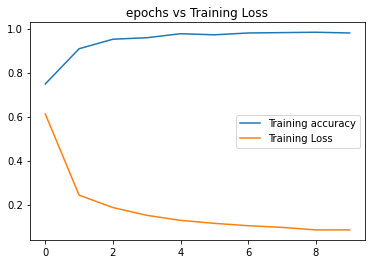

In [37]:
train_accuracy = history_model4.history['accuracy']
train_loss = history_model4.history['loss']

count = range(len(train_accuracy))
plt.plot(count, train_accuracy, label = 'Training accuracy')
plt.plot(count, train_loss, label = 'Training Loss')
plt.title('epochs vs Training Loss')
plt.legend()
plt.show()

In [38]:
eval4 = model4.evaluate(X_test, Y_test)

print ("\nLoss = " + str(eval4[0]))
print ("Test Accuracy = " + str(eval4[1]))

5/5 [==============================] - 0s 16ms/step - loss: 0.3289 - accuracy: 0.9533

Loss = 0.3289048373699188
Test Accuracy = 0.95333331823349


**Prediction**

In [39]:
Y_pred4 = model4.predict(X_test)

Y_pred4[Y_pred4 < 0.5] = 0
Y_pred4[Y_pred4 >= 0.5] = 1

5/5 [==============================] - 0s 17ms/step


**Confusion Matrix**

In [40]:
confusion_mat = confusion_matrix(Y_test, Y_pred4)
print(confusion_mat)

[[64  2]
 [ 5 79]]


## 5. Comparaison

In [41]:
import pandas as pd

In [42]:
dic = { "SGD" : eval1,
        "RMSprop": eval2,
        "Adam": eval3,
        "Adagrad": eval4 }
pd.DataFrame(dic, index = ['loss', 'accuracy'])

,SGD,RMSprop,Adam,Adagrad
loss,0.194876,0.668695,0.162981,0.328905
accuracy,0.960000,0.666667,0.953333,0.953333


# Display images with Predicted & expected labels

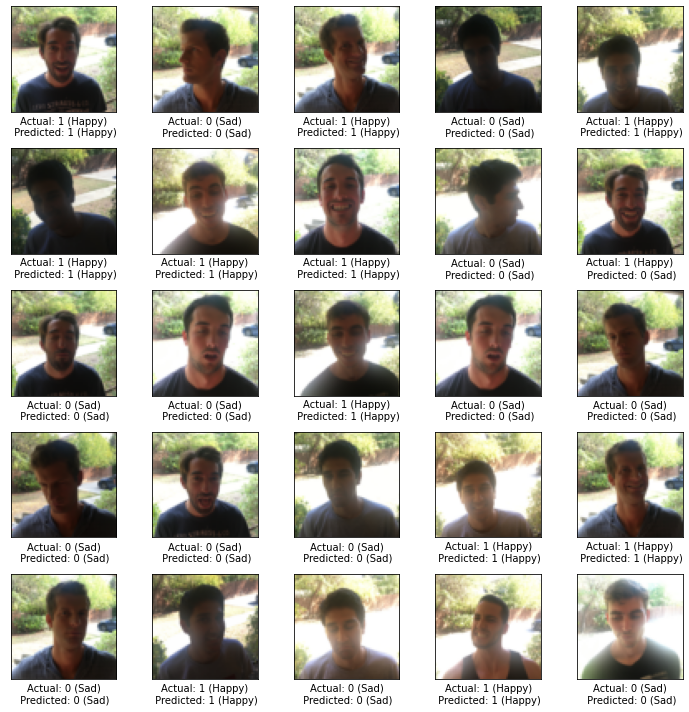

In [43]:
text_labels = ['Sad', 'Happy']
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    
    img_index = np.random.randint(0, 150)
    plt.imshow(X_test_orig[img_index], cmap = plt.cm.gray)
    
    actual_label = int(Y_test_orig[0][img_index])
    predicted_label = int(Y_pred[img_index])
    
    plt.xlabel("Actual: {} ({})\n Predicted: {} ({})".format(
        actual_label, text_labels[actual_label], predicted_label, text_labels[predicted_label]
    ))
    
plt.tight_layout()
plt.show()